# Environment Set Up, Data Preparation, EDA / Preprocessing / Feature Engineering:
In this initial stage of the project, focus is on setting up the environment, preprocessing images, and completing EDA. 

Initially identified the following requirements for setting up the necessary/supported environemtn: 
- Programming language: Python 
- Model Building/Image Recognition Python Framework: Tensor Flow / Keras given its ability to deep learn with features being high-level Keras API, supports transfer learning, and custom models. 
- Data Handling: NumPy for numerical operations/array handling, and Pandas for managing lables
- Image processing and visualization: opencv-python for image processing (resizing, converting color channels, augmentations), Pillow for simple image loading/saving, and matplotlib for plotting training results and displaying images. 
- Data Augmentation: Image Data Generator (Tensor Flow)
- Evaluation and metrics: SKLearn
- Other: OS, Glob, and Random utilities for managing file paths/datasets/scanning directories
Scikit-image

Data image preparation consisted of: 
- Loading data image files
- Evaluating and completing necessary evaluations to confirm integrity of images
- Identifying target images (glioma) and other brain condition images (meningioma)

EDA and Preprocessing/Feature Engineering:
- Loaded and cleaned images 
- Confirmed image dimensions, color channels, quality, integrity, and other features were consistent
- Confirmed class distributions determining no class imbalance (both sets have 2004 image files)
- Verified naming conventions on image files and updated to remove potential for data leakage
- Updated both image numbering conventions to have unique numbering per image file throughout each set
- Utilized an image histogram and pixel intensity approach to visualize and confirm consistency across images
- Normalized image pixel values and completed data split to support preparation for use in deep learning 

In [1]:
#Environment libraries
import numpy as np
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#Model Buidling/Image recognition Python Framework TensorFlow
import tensorflow as tf
print(tf.__version__)

2.19.0


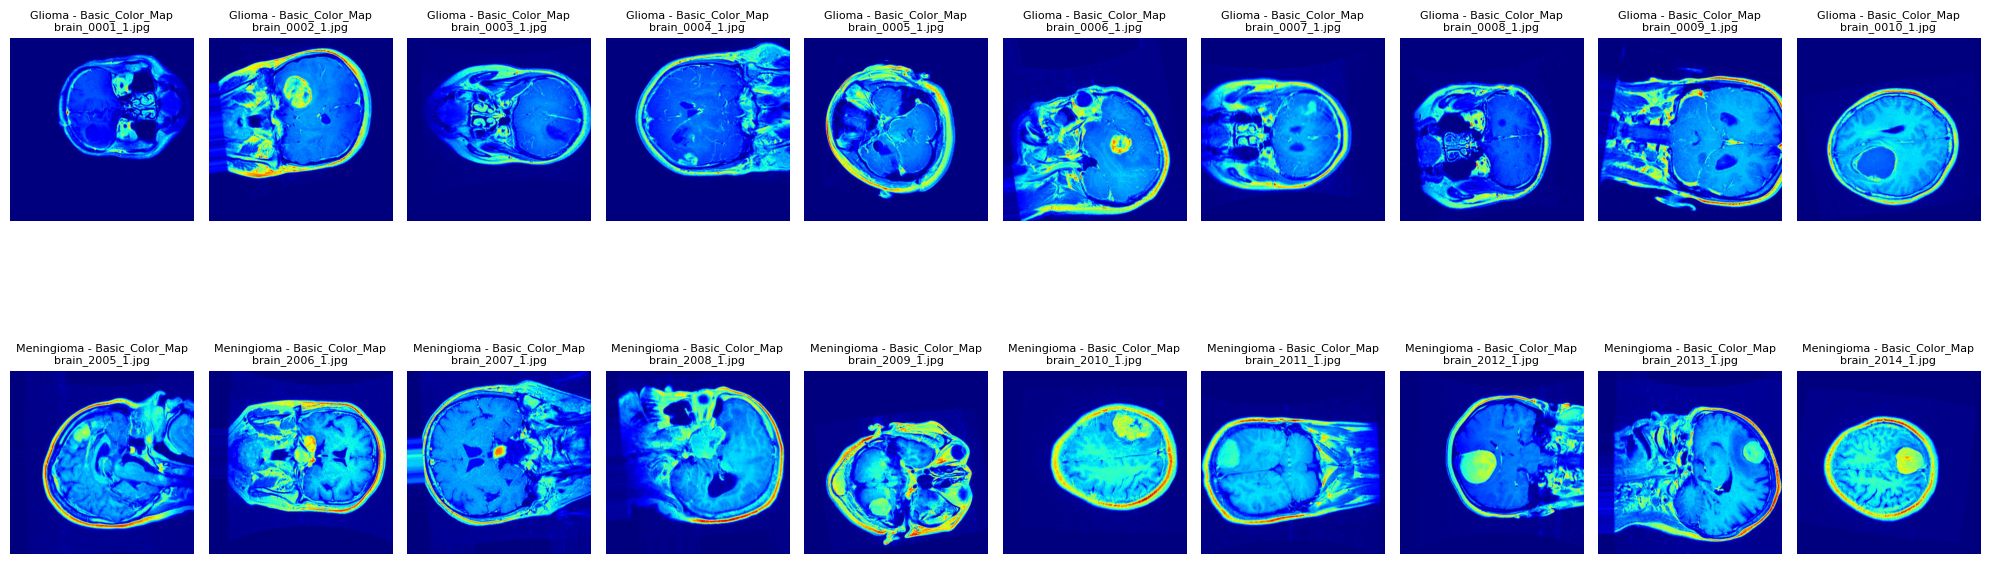

In [4]:
#Load images and display first 10 from each dataset (target brain glioma, other brain condition meningioma)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

parent_folder = "C:/Users/alial/OneDrive/Desktop/LHL/Final Project/Data"
class_folders = ['Glioma - Basic_Color_Map', 'Meningioma - Basic_Color_Map']

num_images_per_class = 10

plt.figure(figsize=(20, 4 * len(class_folders)))  

for idx, class_folder in enumerate(class_folders):
    folder_path = os.path.join(parent_folder, class_folder)
    if os.path.exists(folder_path):
        files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        files = sorted(files)[:num_images_per_class]
        
        for i, fname in enumerate(files):
            img_path = os.path.join(folder_path, fname)
            img = mpimg.imread(img_path)
            
            plt.subplot(len(class_folders), num_images_per_class, idx * num_images_per_class + i + 1)
            plt.imshow(img)
            plt.title(f"{class_folder}\n{fname}", fontsize=8)
            plt.axis('off')
    else:
        print(f"Folder does not exist: {folder_path}")

plt.tight_layout()
plt.show()

In [5]:
#Confirm sizes and shapes of images
import os
import matplotlib.image as mpimg
import numpy as np

parent_folder = "C:/Users/alial/OneDrive/Desktop/LHL/Final Project/Data"
class_folders = ['Glioma - Basic_Color_Map', 'Meningioma - Basic_Color_Map']

all_shapes = []

for class_folder in class_folders:
    folder_path = os.path.join(parent_folder, class_folder)
    if os.path.exists(folder_path):
        files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        for fname in files:
            img_path = os.path.join(folder_path, fname)
            img = mpimg.imread(img_path)
            all_shapes.append(img.shape) 
    else:
        print(f"Folder does not exist: {folder_path}")

#Convert numpy array 
shapes_array = np.array(all_shapes)
print(f"Total images analyzed: {len(shapes_array)}")

heights = shapes_array[:, 0]
widths = shapes_array[:, 1]

print(f"Height - min: {heights.min()}, max: {heights.max()}, mean: {heights.mean():.2f}")
print(f"Width  - min: {widths.min()}, max: {widths.max()}, mean: {widths.mean():.2f}")

#Count channel configurations
unique_shapes, counts = np.unique(shapes_array, axis=0, return_counts=True)
print("\nUnique image shapes and counts:")
for shape, count in zip(unique_shapes, counts):
    print(f"Shape {shape} : {count} images")

Total images analyzed: 4008
Height - min: 512, max: 512, mean: 512.00
Width  - min: 512, max: 512, mean: 512.00

Unique image shapes and counts:
Shape [512 512   3] : 4008 images


### Summary of image shape and size:
All images have the same size and are uniform in represetnation. Dataset is consistent in image dimensions and does not require resizing of images prior to using in model. Confirmation that all images have 3 color channels (RGB). Noted files indicate brain condition type in labeling, this will need to be addressed in further steps to prevent data leakage.

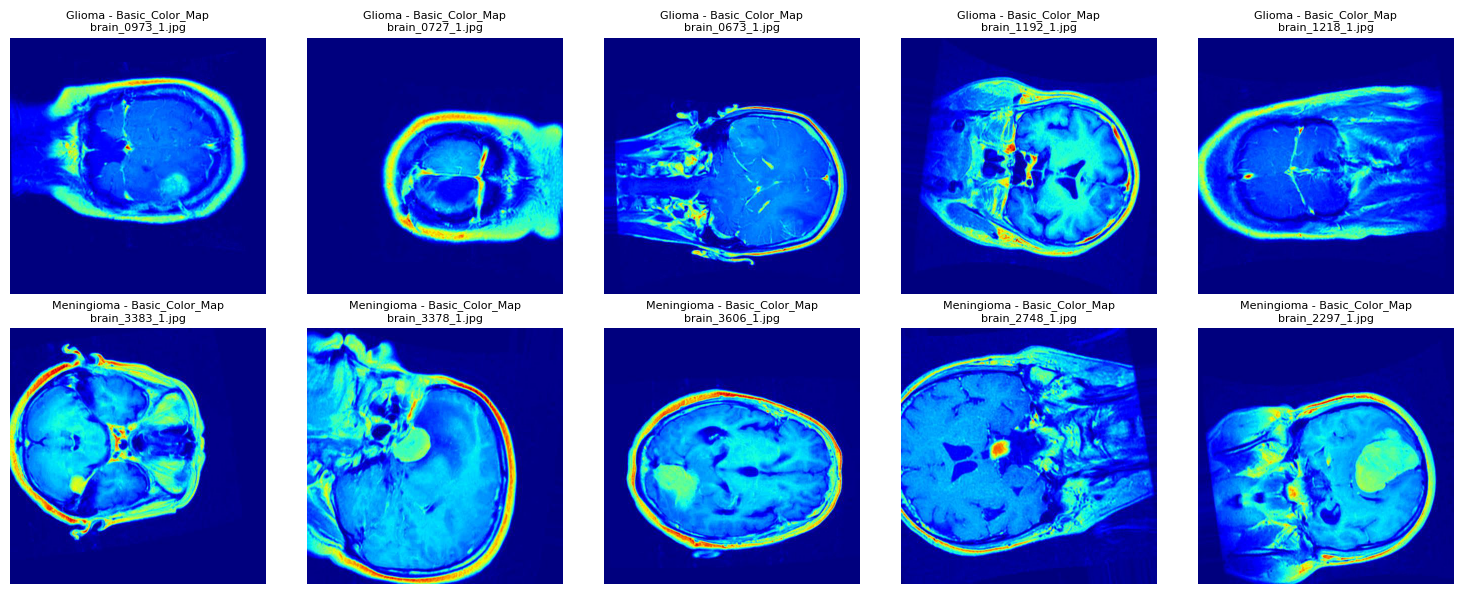

In [6]:
#Check random sample images for quality, class consistency, etc
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

parent_folder = "C:/Users/alial/OneDrive/Desktop/LHL/Final Project/Data"
class_folders = ['Glioma - Basic_Color_Map', 'Meningioma - Basic_Color_Map']

num_samples = 5

plt.figure(figsize=(15, 6))

for idx, class_folder in enumerate(class_folders):
    folder_path = os.path.join(parent_folder, class_folder)
    if os.path.exists(folder_path):
        files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        sampled_files = random.sample(files, min(num_samples, len(files)))
        
        for i, fname in enumerate(sampled_files):
            img_path = os.path.join(folder_path, fname)
            img = mpimg.imread(img_path)
            
            plt.subplot(len(class_folders), num_samples, idx * num_samples + i + 1)
            plt.imshow(img)
            plt.title(f"{class_folder}\n{fname}", fontsize=8)
            plt.axis('off')
    else:
        print(f"Folder does not exist: {folder_path}")

plt.tight_layout()
plt.show()

In [10]:
#Rename files removing class name (prevent data leakage)
import os

parent_folder = "C:/Users/alial/OneDrive/Desktop/LHL/Final Project/Data"
class_folders = ['Glioma - Basic_Color_Map', 'Meningioma - Basic_Color_Map']

for class_folder in class_folders:
    folder_path = os.path.join(parent_folder, class_folder)
    if os.path.exists(folder_path):
        files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        for fname in files:
            if class_folder.lower().startswith('glioma'):
                new_name = fname.replace("glioma_", "")
            elif class_folder.lower().startswith('menin'):
                new_name = fname.replace("menin_", "")
       
                
            if new_name != fname:
                old_path = os.path.join(folder_path, fname)
                new_path = os.path.join(folder_path, new_name)
                
                os.rename(old_path, new_path)
        

        # Get updated file list and sort it
        updated_files = sorted([f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        
        # Print first 10 and last 10 filenames
        print(f"\nFolder: {class_folder}")
        print("First 10 files after renaming:")
        for f in updated_files[:10]:
            print(f)
        print("\nLast 10 files after renaming:")
        for f in updated_files[-10:]:
            print(f)

    else:
        print(f"Folder does not exist: {folder_path}")


Folder: Glioma - Basic_Color_Map
First 10 files after renaming:
brain_0001_1.jpg
brain_0002_1.jpg
brain_0003_1.jpg
brain_0004_1.jpg
brain_0005_1.jpg
brain_0006_1.jpg
brain_0007_1.jpg
brain_0008_1.jpg
brain_0009_1.jpg
brain_0010_1.jpg

Last 10 files after renaming:
brain_1995_1.jpg
brain_1996_1.jpg
brain_1997_1.jpg
brain_1998_1.jpg
brain_1999_1.jpg
brain_2000_1.jpg
brain_2001_1.jpg
brain_2002_1.jpg
brain_2003_1.jpg
brain_2004_1.jpg

Folder: Meningioma - Basic_Color_Map
First 10 files after renaming:
brain_2005_1.jpg
brain_2006_1.jpg
brain_2007_1.jpg
brain_2008_1.jpg
brain_2009_1.jpg
brain_2010_1.jpg
brain_2011_1.jpg
brain_2012_1.jpg
brain_2013_1.jpg
brain_2014_1.jpg

Last 10 files after renaming:
brain_3999_1.jpg
brain_4000_1.jpg
brain_4001_1.jpg
brain_4002_1.jpg
brain_4003_1.jpg
brain_4004_1.jpg
brain_4005_1.jpg
brain_4006_1.jpg
brain_4007_1.jpg
brain_4008_1.jpg


In [11]:
total_files = 0
for class_folder in class_folders:
    folder_path = os.path.join(parent_folder, class_folder)
    if os.path.exists(folder_path):
        files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        total_files += len(files)

print(f"Total image files across all folders: {total_files}")

Total image files across all folders: 4008


In [12]:
#Update second set of data to start numbering files at 2005 instead of 1 (first set runs 1 - 2005 as well), to address image numbering duplication/overlap 
import re

parent_folder = "C:/Users/alial/OneDrive/Desktop/LHL/Final Project/Data"
second_class_folder = "Meningioma - Basic_Color_Map"
folder_path = os.path.join(parent_folder, second_class_folder)

start_num = 2005

pattern = re.compile(r"(brain_)(\d{4})(_1\.jpg)")

if os.path.exists(folder_path):
    files = sorted([f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
    
    numbers = []
    for fname in files:
        match = pattern.match(fname)
        if match:
            numbers.append(int(match.group(2)))
    
    if not numbers:
        print("No files matched the pattern.")
    else:
        min_num = min(numbers)
        offset = start_num - min_num
        
        for fname in files:
            match = pattern.match(fname)
            if match:
                prefix, number_str, suffix = match.groups()
                old_num = int(number_str)
                new_num = old_num + offset 
                
                new_num_str = f"{new_num:04d}"
                new_name = f"{prefix}{new_num_str}{suffix}"
                
                old_path = os.path.join(folder_path, fname)
                new_path = os.path.join(folder_path, new_name)
                
                os.rename(old_path, new_path)
            else:
                print(f"Skipping file with unexpected name format: {fname}")
        
        updated_files = sorted([f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
        
        print("\nFirst 10 filenames after renaming:")
        for f in updated_files[:10]:
            print(f)
        
        print("\nLast 10 filenames after renaming:")
        for f in updated_files[-10:]:
            print(f)
else:
    print(f"Folder does not exist: {folder_path}")


First 10 filenames after renaming:
brain_2005_1.jpg
brain_2006_1.jpg
brain_2007_1.jpg
brain_2008_1.jpg
brain_2009_1.jpg
brain_2010_1.jpg
brain_2011_1.jpg
brain_2012_1.jpg
brain_2013_1.jpg
brain_2014_1.jpg

Last 10 filenames after renaming:
brain_3999_1.jpg
brain_4000_1.jpg
brain_4001_1.jpg
brain_4002_1.jpg
brain_4003_1.jpg
brain_4004_1.jpg
brain_4005_1.jpg
brain_4006_1.jpg
brain_4007_1.jpg
brain_4008_1.jpg


In [ ]:
#Install opencv but as tries to pull updated numpy, include no dependencies to keep compatible numpy 1.26 (prevent breaking environment) 
!pip install opencv-python --no-deps

import cv2
import numpy
import tensorflow as tf

print("OpenCV version:", cv2.__version__)
print("NumPy version:", numpy.__version__)
print("TensorFlow version:", tf.__version__)

OpenCV version: 4.12.0
NumPy version: 1.26.4
TensorFlow version: 2.19.0


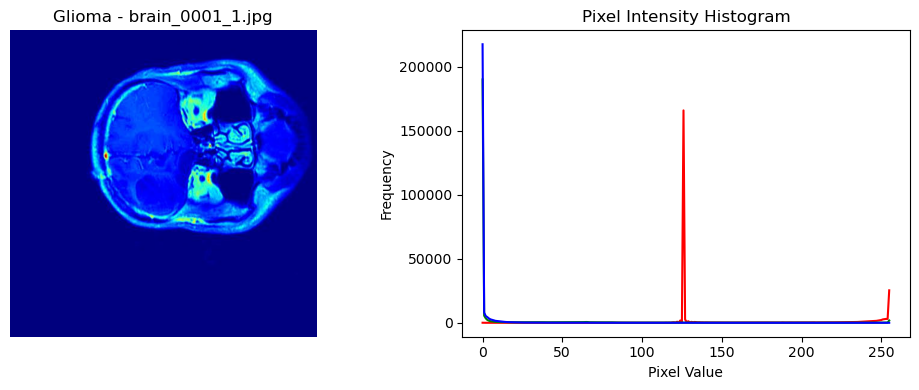

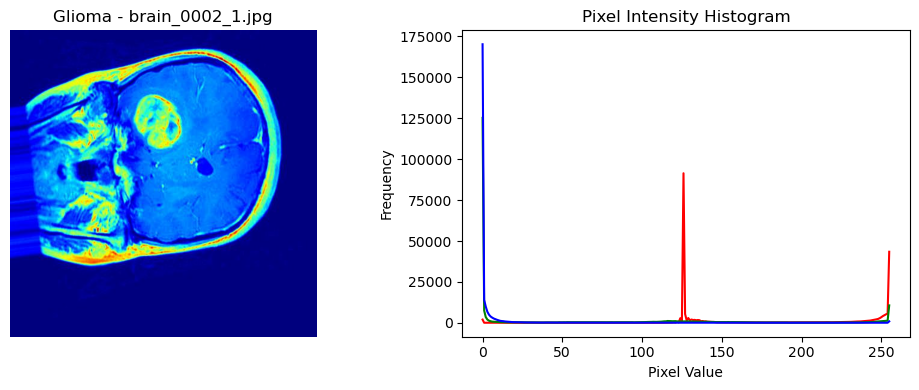

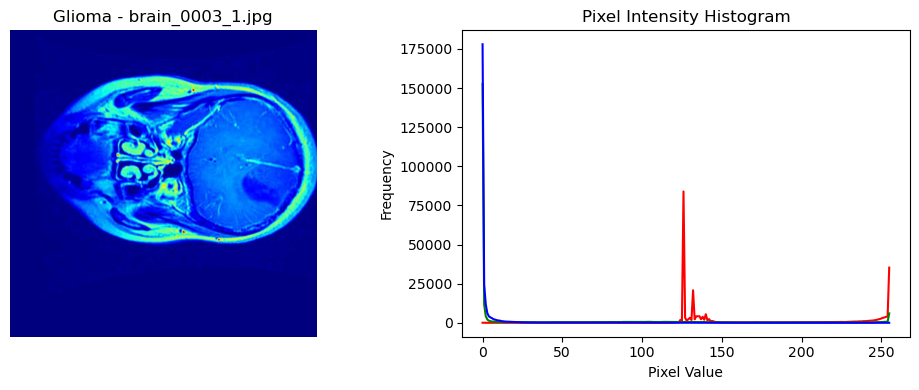

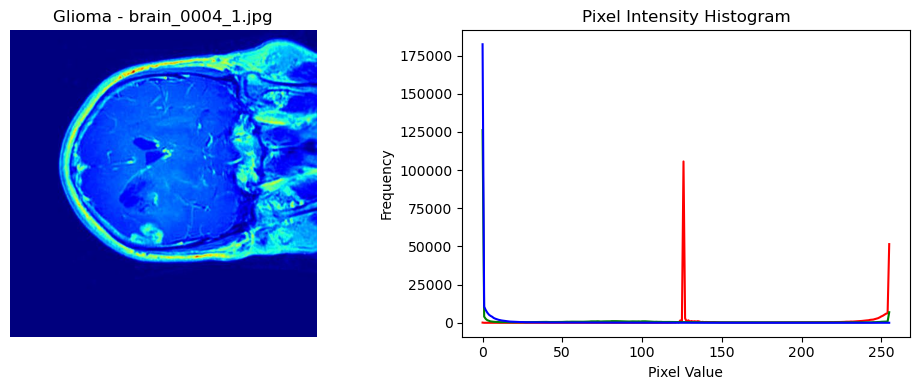

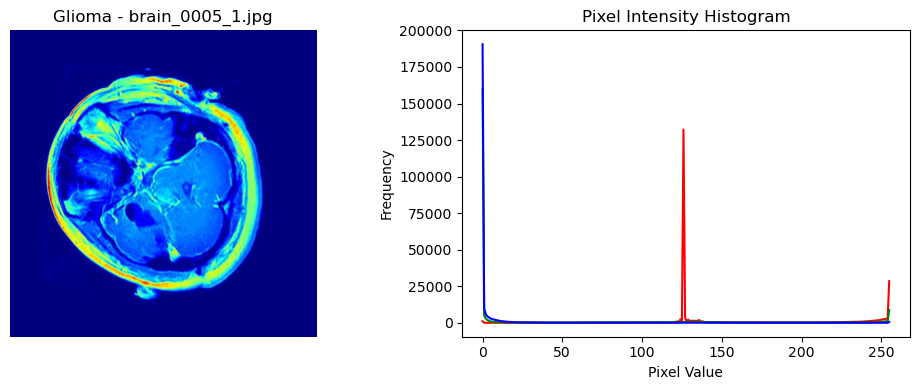

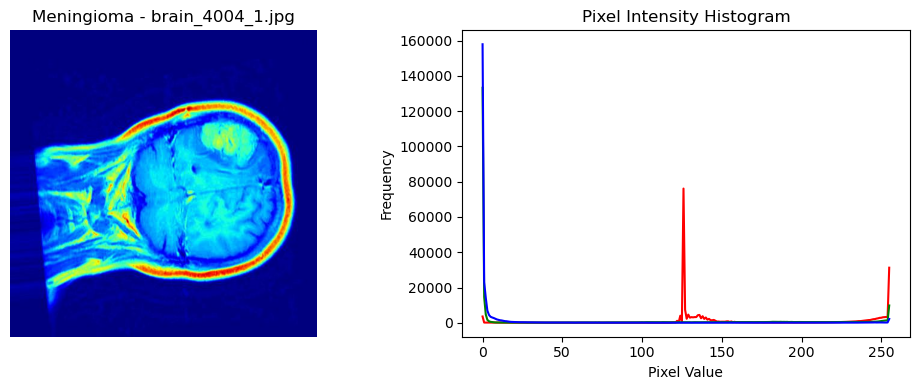

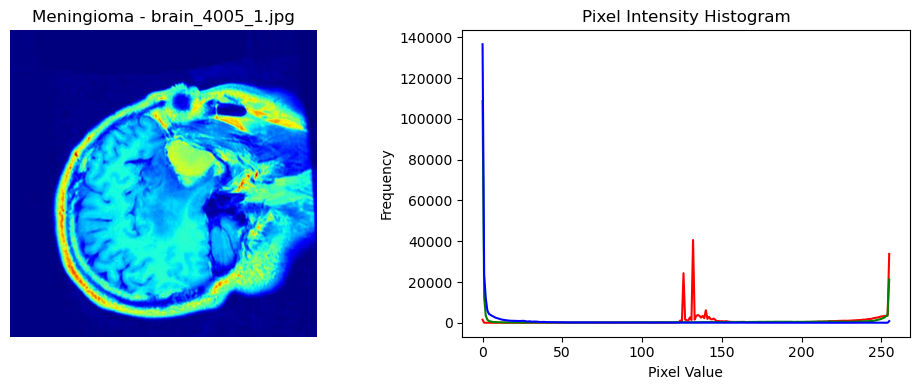

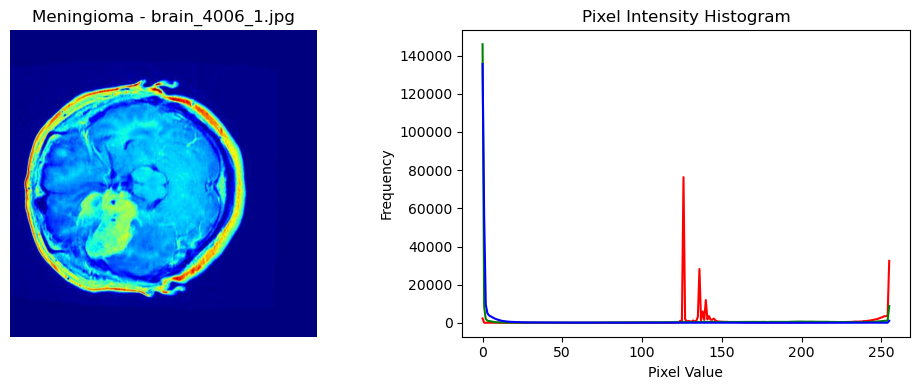

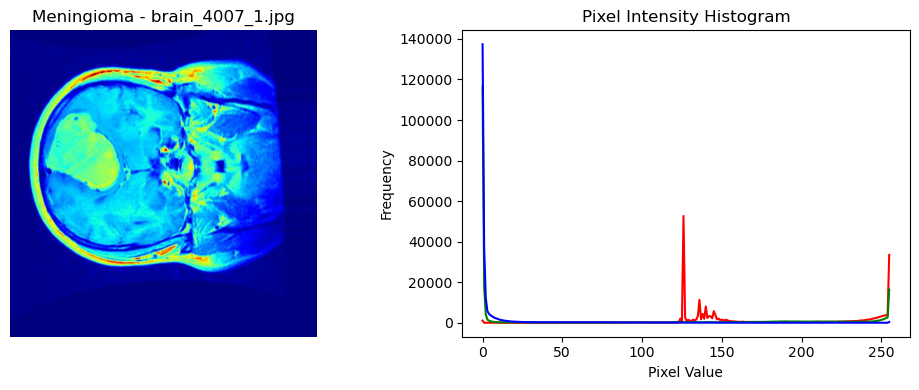

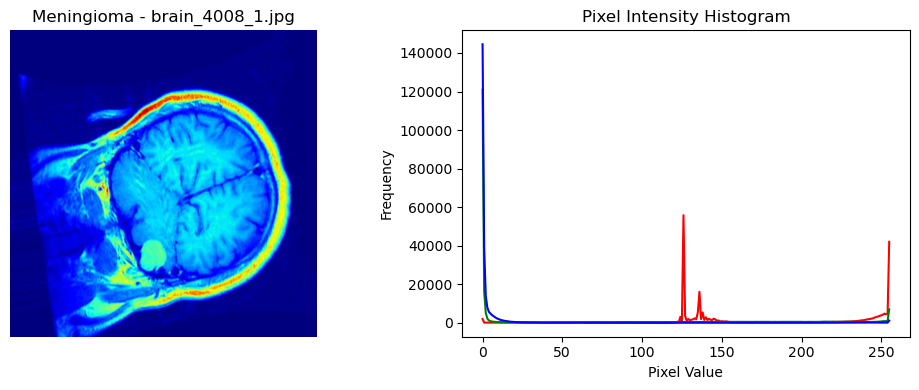

In [16]:
#Check pixel intensity using histogram
import os
import cv2
import matplotlib.pyplot as plt

parent_dir = "C:/Users/alial/OneDrive/Desktop/LHL/Final Project/Data"

glioma_path = os.path.join(parent_dir, "Glioma - Basic_Color_Map")
meningioma_path = os.path.join(parent_dir, "Meningioma - Basic_Color_Map")

glioma_files = sorted([f for f in os.listdir(glioma_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
meningioma_files = sorted([f for f in os.listdir(meningioma_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])


glioma_sample = glioma_files[:5]  #First 5 from Glioma
meningioma_sample = meningioma_files[-5:]  #Last 5 from Meningioma

#Combine with paths and labels
samples = [(os.path.join(glioma_path, f), "Glioma") for f in glioma_sample] + \
          [(os.path.join(meningioma_path, f), "Meningioma") for f in meningioma_sample]


for img_path, label in samples:
    img = cv2.imread(img_path)
    if img is None:
        print(f"Could not read: {img_path}")
        continue

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    #Plot image and histogram
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title(f"{label} - {os.path.basename(img_path)}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    colors = ('r', 'g', 'b')
    for i, color in enumerate(colors):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
    plt.title("Pixel Intensity Histogram")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

### Summary of Histogram Observations
 Image histogram and pixel intensity approach used to visualize and confirm consistency across images from each set of images. Result was that samples all appear to indicate:
 - sharp peak pixel values at 0 indicating large number are pure black possibly background, 
 - another peak mid 130 suggest large portion red channel pizels are mid-tone, and, 
 - and smaller peak nearing 255 indicate some pixels fully white which could be borders